## This notebook is an exploration of an Olympics dataset, "120 years of Olympic history: athletes and results". First, we'll take a peek at the data and see what ideas we can come up with for possible tasks. Then, we'll perform Data Cleaning, EDA, and finally, some modeling. 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# set the figure size for matplotlib plots 
plt.rcParams["figure.figsize"] = (12, 8)
        

In [ ]:
df = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
df.shape

In [ ]:
df.head()

## **Initial questions/ thoughts about the data:**


General questions:
* what's the distribution of male to female athletes? has this changed over time?
* what about the distribution of athlete weights? how does this differ by sport?
    * which sports have the highest/ lowest weights?
* same as questions above, but with ages
* do younger athletes win more than older ones?
* what's the distribution of athlete age by country?
    * do some countries have older athletes?
    * how does this change over time for some specific countries?
* is there a "home country" advantage?
    * statistically significant difference in medals
    * how would we measure this? lots of confounding variables
    

Data Cleaning:
* how many missing values do we have in each column?
* how will we parse out country names - "Denmark/ Sweden" should be 1 for Denmark, 1 for Sweden

Modeling:
* can we predict who will win certain sports?
    * ex: if U.S. team has a much higher average weight for a sport
      where weight is a factor
* can we predict who will win a medal?




## Data Cleaning

Number of missing entries by column:

In [ ]:
df.isna().sum()

Share of total data that's missing by column:

In [ ]:
missing = df.isna().sum()
missing[missing!=0]/df.shape[0]

We're missing alot of the 'medals' column! Instead of missing data, we should instead have a category for "No medal", because the lack of a medal could be just as important.

In [ ]:
df.groupby('Medal')['ID'].count()

In [ ]:
df['Medal'].fillna('No Medal', inplace = True)
df.head()

We can see in the "Medal" column, the NaN's have been replaced. Success!

Next, let's look at some summary statistics.

## Exploring the data

In [ ]:
df.describe()

From this, we can see several interesting phenomena. For one, the minimum age is 10, and the maximum is 97 -   certainly intriguing. I'll look at this below, but first, some more observations: the maximum weight is **214 Kilos**, or **417 pounds**! Additionally, note that the maximum ID is 135,571, which is nowhere near the total number of rows (271,116). This implies a large number of repeat Olympians (as expected), which raises some more questions: 
* who went to the most Olympics? 
* how common is it for people to go to more than one Olympic games?

And so on. 
    Now, let's explore these anomalies in more detail. 

## Olympic Outliers

In [ ]:
df[df['Age'] ==10.0]

Not only did a 10 year old compete in the Olympics - he was a Bronze medal recipient! The following is from his [Wikipedia page](https://en.wikipedia.org/wiki/Dimitrios_Loundras): 
>Loundras competed in the team parallel bars event.. At 10 years 218 days he remains the youngest medalist and competitor in Olympic history

Also take a look at the picture below - he's the tiny one in the middle!


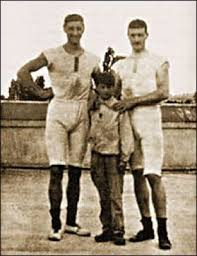

In [ ]:
df[df['Age'] == 97]

In [ ]:
df[df['Weight'] == 214] 

In [ ]:
appearances = df.groupby('ID')['Name'].count().sort_values(ascending = False)
appearances[:10]


To get an idea of how (un)likely it is that someone went to multiple Olympic games, I created a density plot below:

In [ ]:
sns.distplot(df.groupby('ID')['Name'].count().values)\
.set_title('Distribution of # of Olympic games attended');

In [ ]:
uncle = df[df['Name'] == 'Arthur Byron MacDonald']

uncle

In [ ]:
df.groupby('Season').ID.count()

In [ ]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

In [ ]:
summer_counts = summer_df.groupby('Year').count()
summer_counts.tail()

In [ ]:
winter_counts = winter_df.groupby('Year').count()
winter_counts.tail()

In [ ]:
df.Medal

In [ ]:
summer_medals = summer_df[summer_df['Medal'] != 'No Medal'][['Year', 'Medal']].groupby('Year').count()
winter_medals = winter_df[winter_df['Medal'] != 'No Medal'][['Year', 'Medal']].groupby('Year').count()

plt.plot(summer_medals);
plt.plot(winter_medals);